In [1]:
import os

if os.path.exists('credential.json'):
    os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = os.path.join(os.getcwd(), 'credential.json')
    os.environ["GOOGLE_CLOUD_PROJECT"] = "trading-290017"
else:
    print('the credential.json file does not exist')

import importlib

In [2]:
import logging, sys

logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s [%(threadName)-12.12s] [%(levelname)-5.5s]  %(message)s",
    handlers=[
        logging.StreamHandler(sys.stdout)
    ]
)

In [13]:
import pandas as pd
import numpy as np

In [3]:
import market_data.ingest.bq.cache
importlib.reload(market_data.ingest.bq.cache)

<module 'market_data.ingest.bq.cache' from '/home/junlim/projects/jitter_recovery/market_data/ingest/bq/cache.py'>

In [9]:
import market_data
import market_data.ingest.bq.common
import market_data.ingest.bq.candle
dataset_mode = market_data.ingest.bq.common.DATASET_MODE.OKX
export_mode = market_data.ingest.bq.common.EXPORT_MODE.BY_MINUTE
t_id = market_data.ingest.bq.common.get_full_table_id(dataset_mode, export_mode)
date_str_from='2024-11-20'
date_str_to='2024-11-21'
df = market_data.ingest.bq.candle.fetch_minute_candle(t_id, aggregation_mode=market_data.ingest.bq.common.AGGREGATION_MODE.TAKE_LASTEST, date_str_from=date_str_from, date_str_to=date_str_to)


    WITH LATEST AS (
    SELECT timestamp, symbol, max(ingestion_timestamp) AS max_ingestion_timestamp
    FROM `trading-290017.market_data_okx.by_minute` 
    WHERE TRUE
    AND timestamp >= "2024-11-20T00:00:00-0500"
    AND timestamp < "2024-11-21T00:00:00-0500"
    GROUP BY timestamp, symbol
    )

    SELECT T.timestamp, T.symbol, open, high, low, close, volume
    FROM `trading-290017.market_data_okx.by_minute` AS T JOIN 
        LATEST ON T.timestamp = LATEST.timestamp AND T.symbol = LATEST.symbol 
        AND IFNULL(T.ingestion_timestamp, PARSE_TIMESTAMP("%c", "Thu Dec 25 07:30:00 2008")) = IFNULL(LATEST.max_ingestion_timestamp, PARSE_TIMESTAMP("%c", "Thu Dec 25 07:30:00 2008"))
    WHERE TRUE
    AND T.timestamp >= "2024-11-20T00:00:00-0500"
    AND T.timestamp < "2024-11-21T00:00:00-0500"
    ORDER BY T.timestamp ASC



In [38]:
df

,symbol,open,high,low,close,volume
timestamp,,,,,,
2024-11-20 00:00:00-05:00,ATOM-USDT-SWAP,6.348000,6.352000,6.335000,6.343000,6784.0000
2024-11-20 00:00:00-05:00,SLP-USDT-SWAP,0.003183,0.003185,0.003181,0.003185,741880.0000
2024-11-20 00:00:00-05:00,ZRX-USDT-SWAP,0.416100,0.416400,0.415500,0.416400,21980.0000
2024-11-20 00:00:00-05:00,BCH-USDT-SWAP,436.400000,436.900000,436.000000,436.500000,344.6400
2024-11-20 00:00:00-05:00,UXLINK-USDT-SWAP,0.588200,0.588800,0.587400,0.588400,54680.0000
...,...,...,...,...,...,...
2024-11-20 23:59:00-05:00,MAGIC-USDT-SWAP,0.401400,0.401400,0.400600,0.400800,11467.0000
2024-11-20 23:59:00-05:00,ONT-USDT-SWAP,0.218700,0.219100,0.218600,0.218700,91450.0000
2024-11-20 23:59:00-05:00,BCH-USD-SWAP,495.700000,497.100000,493.800000,496.400000,82.0277


In [55]:
df_btc = df[df.symbol == "BTC-USDT-SWAP"]
df_btc_short = df_btc.iloc[:20]

In [23]:
df_btc_short.index

DatetimeIndex(['2024-11-20 00:00:00-05:00', '2024-11-20 00:01:00-05:00',
               '2024-11-20 00:02:00-05:00', '2024-11-20 00:03:00-05:00',
               '2024-11-20 00:04:00-05:00', '2024-11-20 00:05:00-05:00',
               '2024-11-20 00:06:00-05:00', '2024-11-20 00:07:00-05:00',
               '2024-11-20 00:08:00-05:00', '2024-11-20 00:09:00-05:00',
               '2024-11-20 00:10:00-05:00', '2024-11-20 00:11:00-05:00',
               '2024-11-20 00:12:00-05:00', '2024-11-20 00:13:00-05:00',
               '2024-11-20 00:14:00-05:00', '2024-11-20 00:15:00-05:00',
               '2024-11-20 00:16:00-05:00', '2024-11-20 00:17:00-05:00',
               '2024-11-20 00:18:00-05:00', '2024-11-20 00:19:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='timestamp', freq=None)

In [56]:
df0 = df_btc_short.index.searchsorted(df_btc_short.index - pd.Timedelta(minutes=10))

In [57]:
df0

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [58]:
df_btc_short.index[df0[df0>0]-1]

DatetimeIndex(['2024-11-20 00:00:00-05:00', '2024-11-20 00:01:00-05:00',
               '2024-11-20 00:02:00-05:00', '2024-11-20 00:03:00-05:00',
               '2024-11-20 00:04:00-05:00', '2024-11-20 00:05:00-05:00',
               '2024-11-20 00:06:00-05:00', '2024-11-20 00:07:00-05:00',
               '2024-11-20 00:08:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='timestamp', freq=None)

In [59]:
g_raw = df_btc["close"]

In [60]:
g_raw.diff()

timestamp
2024-11-20 00:00:00-05:00      NaN
2024-11-20 00:01:00-05:00      0.1
2024-11-20 00:02:00-05:00   -103.3
2024-11-20 00:03:00-05:00    -44.3
2024-11-20 00:04:00-05:00      5.1
                             ...  
2024-11-20 23:55:00-05:00    391.0
2024-11-20 23:56:00-05:00    273.2
2024-11-20 23:57:00-05:00    -83.0
2024-11-20 23:58:00-05:00   -111.9
2024-11-20 23:59:00-05:00    199.8
Name: close, Length: 1301, dtype: float64

In [61]:
h = 1000

t_events, s_pos, s_neg = [], 0, 0
diff = g_raw.diff()
for i in diff.index[1:]:
    s_pos = max(0, s_pos + diff.loc[i])
    s_neg = min(0, s_neg + diff.loc[i])
    if s_neg < -h:
        s_neg = 0
        t_events.append(i)
    elif s_pos > h:
        s_pos = 0
        t_events.append(i)

events = pd.DatetimeIndex(t_events)

In [62]:
events

DatetimeIndex(['2024-11-20 03:15:00-05:00', '2024-11-20 08:16:00-05:00',
               '2024-11-20 11:24:00-05:00', '2024-11-20 13:45:00-05:00',
               '2024-11-20 15:25:00-05:00', '2024-11-20 19:28:00-05:00',
               '2024-11-20 22:25:00-05:00', '2024-11-20 23:04:00-05:00',
               '2024-11-20 23:55:00-05:00'],
              dtype='datetime64[ns, America/New_York]', freq=None)

In [65]:
df_btc.loc[events]

,symbol,open,high,low,close,volume
2024-11-20 03:15:00-05:00,BTC-USDT-SWAP,92965.6,93058.0,92960.0,93037.8,248.659
2024-11-20 08:16:00-05:00,BTC-USDT-SWAP,94128.2,94381.1,94112.1,94243.9,923.742
2024-11-20 11:24:00-05:00,BTC-USDT-SWAP,93944.0,93956.3,93750.1,93777.9,610.739
2024-11-20 13:45:00-05:00,BTC-USDT-SWAP,93400.1,93400.2,93209.9,93234.3,590.618
2024-11-20 15:25:00-05:00,BTC-USDT-SWAP,94154.8,94235.5,94145.4,94195.1,108.839
2024-11-20 19:28:00-05:00,BTC-USDT-SWAP,94737.1,94899.9,94688.7,94840.8,668.177
2024-11-20 22:25:00-05:00,BTC-USDT-SWAP,94975.9,95378.9,94975.9,95325.9,1948.419
2024-11-20 23:04:00-05:00,BTC-USDT-SWAP,96165.4,96659.7,96120.2,96428.0,2385.779
2024-11-20 23:55:00-05:00,BTC-USDT-SWAP,96910.7,97332.6,96908.0,97301.7,1178.687


In [66]:
import matplotlib.pyplot as plt

<Axes: xlabel='timestamp', ylabel='Price'>

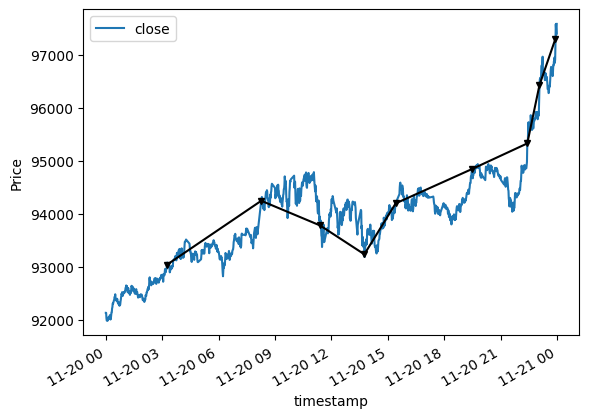

In [68]:
fig = plt.figure()
ax1 = fig.add_subplot(111,  ylabel='Price')

df_btc[['close']].plot(ax=ax1)
df_btc.loc[events]['close'].plot(ax=ax1, marker="v", markersize=5, color='k')